## Kidney Disease Dataset EDA and Feature Enginnering

Cleaning of the dataset and making conclusion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the csv dataset in the df
df = pd.read_csv('kidney_disease.csv')

In [3]:
# Seeing the top 5 rows of the dataset
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# Seeing the last 5 rows of the dataset
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [5]:
# Displaying the information of each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
df.shape

(400, 26)

In these dataset there are 400 rows and the 26 features are present

In [7]:
# Dropping the id  column because there is no relation with the ouptput and the id
df.drop('id',axis=1,inplace=True)

In [8]:
# Seperating the categorical and numerical column
lst_cat = []
lst_num=[]
for i in df.columns :
    if (df[i].dtypes=='object') :
        lst_cat.append(i)
    else :
        lst_num.append(i)

In [9]:
# Displatying the categorical columns
lst_cat

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [10]:
# Displaying the numerical columns
lst_num

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

Total number of categorical feature present in the dataset are 14
Total number of numerical feature present in the dataset are 11

Doing the encoding of the categorical column

In [11]:
df['rbc'] = df['rbc'].astype(str)


In [12]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [13]:
df['rbc'] = df['rbc'].map({'normal': 0, 'abnormal': 1})

In [14]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,0.0,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,0.0,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,0.0,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [15]:
df['rbc'].value_counts()
# Encoding the pc column
df['pc'] = df['pc'].map({'normal':0,'abnormal':1})
df['pc'].value_counts()
# Encoding the pcc column
df['pcc'].unique()
df['pcc'] = df['pcc'].map({'present':1,'notpresent':0})
df['pcc'].value_counts()
# Encoding the ba column
df['ba'] = df['ba'].map({'present':1,'notpresent':0})
df['ba'].value_counts()
# Encoding the htn cloumn
df['htn'].unique()
df['htn'] = df['htn'].map({'yes':1,'no':0})

df['htn'].value_counts()
# For removing \tno or \tyes these type of values we have to replace it
df['dm'].value_counts()
df['dm'] = df['dm'].str.strip().str.replace(r'\t', '')
df['dm'] = df['dm'].map({'yes':1,'no':0})
df['dm'].value_counts()
# For removing \tno these type of values we have to replace it
df['cad'].value_counts()
df['cad'] = df['cad'].str.strip().str.replace(r'\t', '')
# Encoding the cad cloumn
df['cad'] = df['cad'].map({'yes':1,'no':0})
df['cad'].value_counts()
# Encoding the appet cloumn
df['appet'] = df['appet'].map({'good':1,'poor':0})
df['appet'].value_counts()
# Encoding the pe cloumn
df['pe'] = df['pe'].map({'yes':1,'no':0})
df['pe'].value_counts()
# Encoding the pe cloumn
df['ane'] = df['ane'].map({'yes':1,'no':0})
df['ane'].value_counts()

ane
0.0    339
1.0     60
Name: count, dtype: int64

Converting from object to int because the value in the column are the numerical

In [16]:
# Converting the pcv column to the int from the object
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce').astype('Int64')

In [17]:
# Converting the wc column to the int from the object
df['wc'] = pd.to_numeric(df['wc'], errors='coerce').astype('Int64')

In [18]:
# Converting the rc column to the float from the object
df['rc'] = pd.to_numeric(df['rc'], errors='coerce').astype('float64')

In [19]:
# Tommorow agenda handle the missing value(Categorical and Encoded feature-> Mode) and (Numerical feature-> Mean or Mode)

In [20]:
lst_num

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

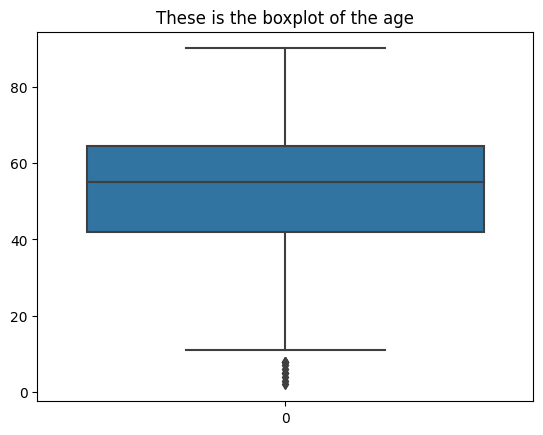

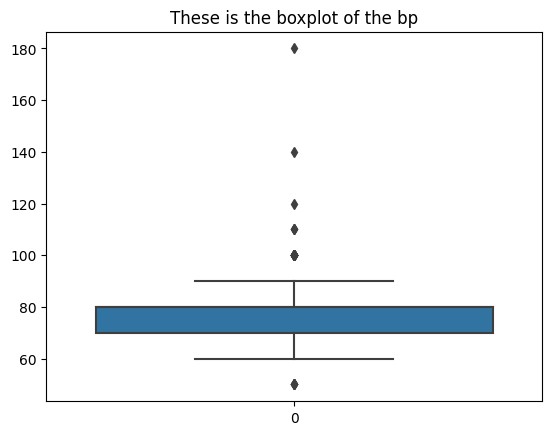

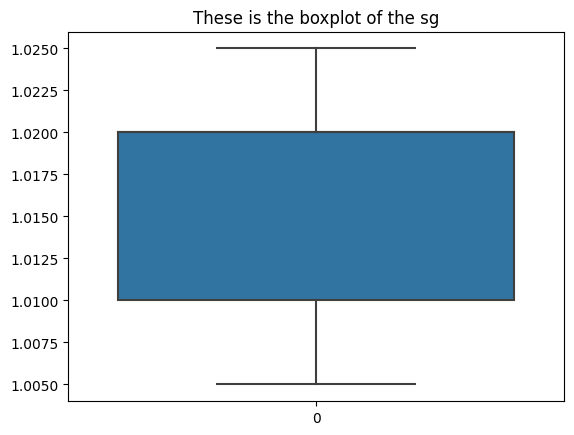

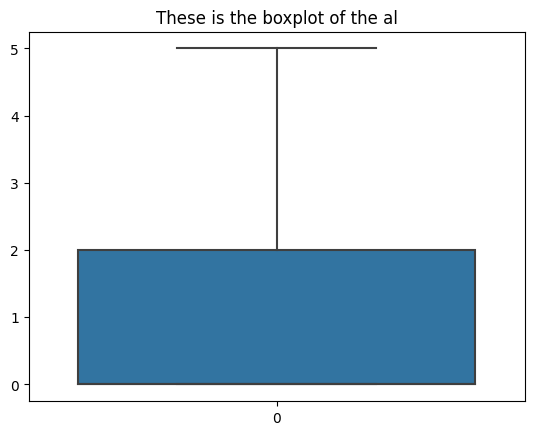

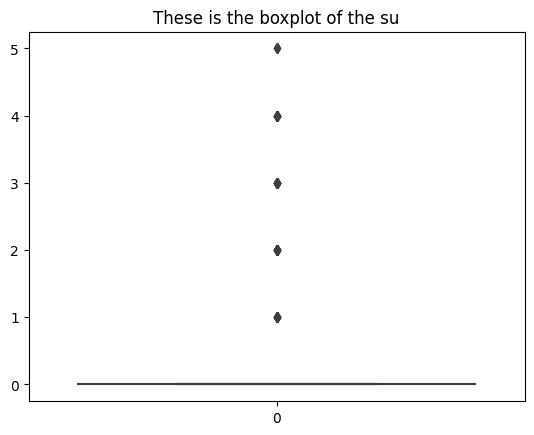

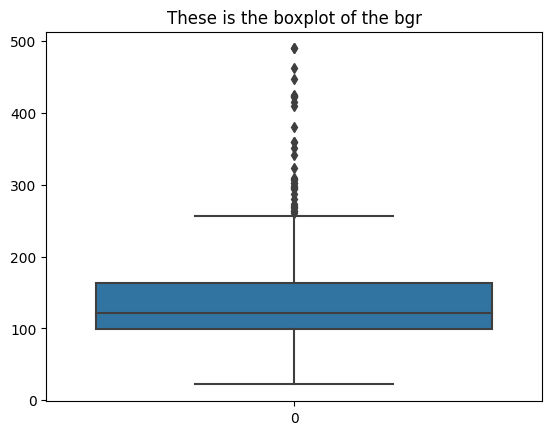

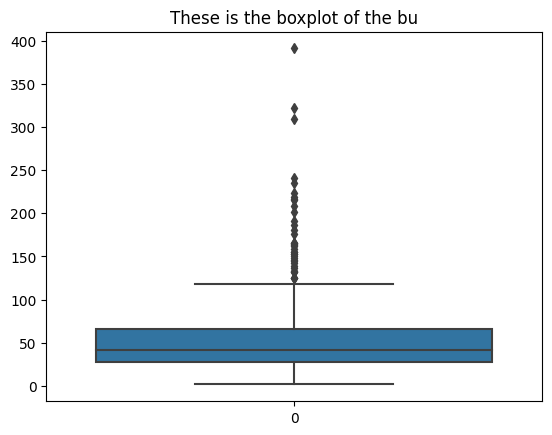

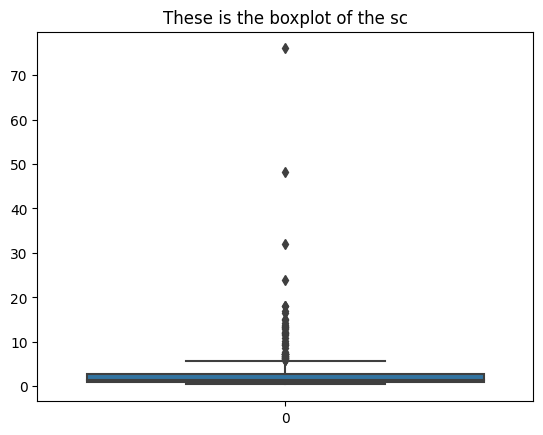

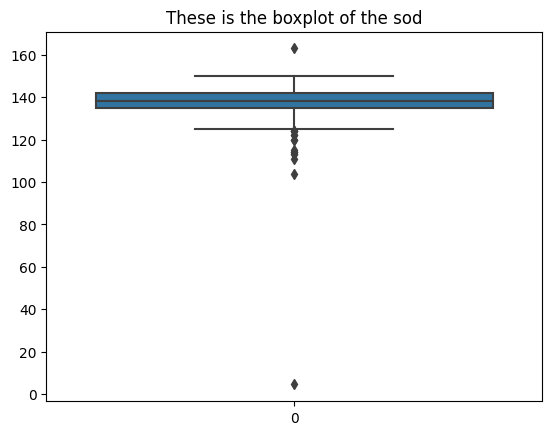

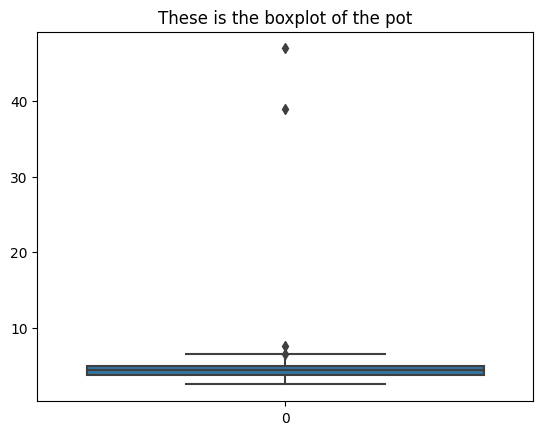

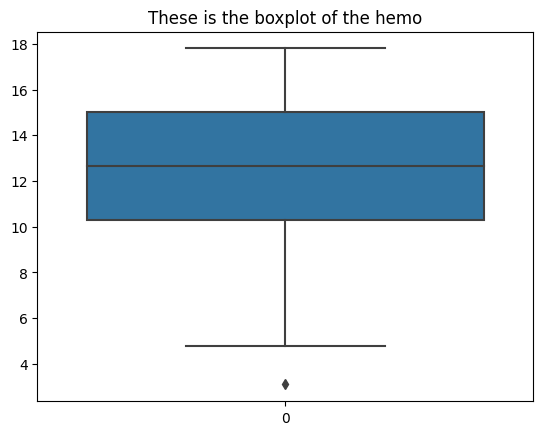

In [21]:
for i in lst_num :
    plt.figure()
    plt.title("These is the boxplot of the {}".format(i))
    sns.boxplot(df[i])
    plt.show()

<Axes: >

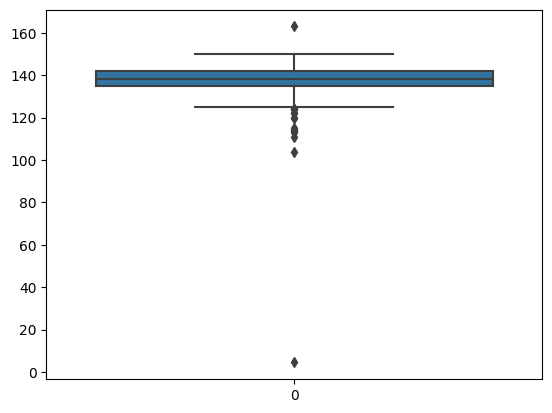

In [22]:
sns.boxplot(df['sod'])

In [23]:
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

<Axes: >

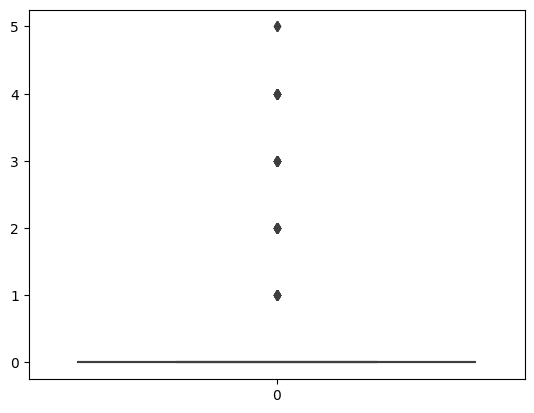

In [24]:
sns.boxplot(df['su'])

Features that contains the outliers are
age,bp,su,bgr,bu,sc

Features that do not contains the outliers are
sg,al

In [25]:
# Removing all the Nan values from all the features of the dataset on the basis of numerical and categorical
# If numerical and contains outliers replace with median
# If numerical and do not contains outliers replace with mean
# If categorical replace with mode

In [26]:
lst_outliers=['age','bp','su','bgr','bu','sc','sod','pot','hemo']
print(lst_outliers)

['age', 'bp', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']


In [27]:
lst_no_outliers=['sg','al']
print(lst_no_outliers)

['sg', 'al']


In [28]:
# Replacing all the Nan values with the median which contain the outliers
for i in lst_outliers :
    median_feature = df[i].median()
    df[i].fillna(value=median_feature,inplace=True)


In [29]:
# Replacing all the Nan values with the mean which do not contain the outliers
for i in lst_no_outliers :
    mean_feature = df[i].mean()
    df[i].fillna(value=mean_feature,inplace=True)

In [30]:
# Replacing all the Nan values with the mode of the categorical 
for i in lst_cat :
    mode_feature = df[i].mode()[0]
    df[i].fillna(value=mode_feature,inplace=True)
    


In [31]:
lst_outliers=['age','bp','su','bgr','bu','sc','sod','pot','hemo']
print(lst_outliers)

['age', 'bp', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']


In [32]:
# Function for calculating the lower fence and the higher fence
# def outliers(df, variable):
#     Q3 = df[variable].quantile(0.75)
#     Q1 = df[variable].quantile(0.25)
#     IQR = Q3 - Q1
#     lower_fence = Q1 - 1.5 * IQR
#     higher_fence = Q3 + 1.5 * IQR
#     return lower_fence,higher_fence
        

In [33]:
df.shape

(400, 25)

# Visualizing the dataset using the graph

In [34]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

<Axes: xlabel='age', ylabel='bp'>

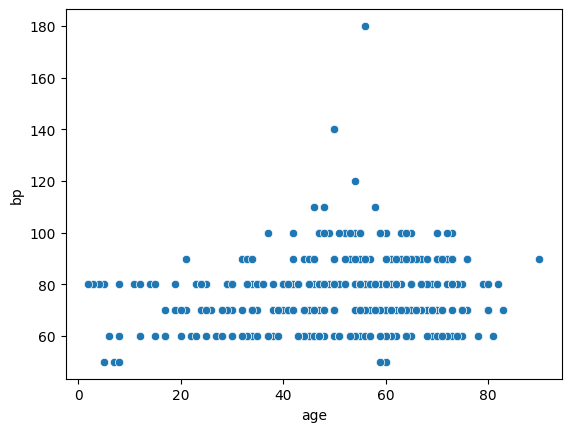

In [35]:
sns.scatterplot(data=df,x='age',y='bp')

In [ ]:
# Conclusion from bp vs agez


In [37]:
lst_num

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

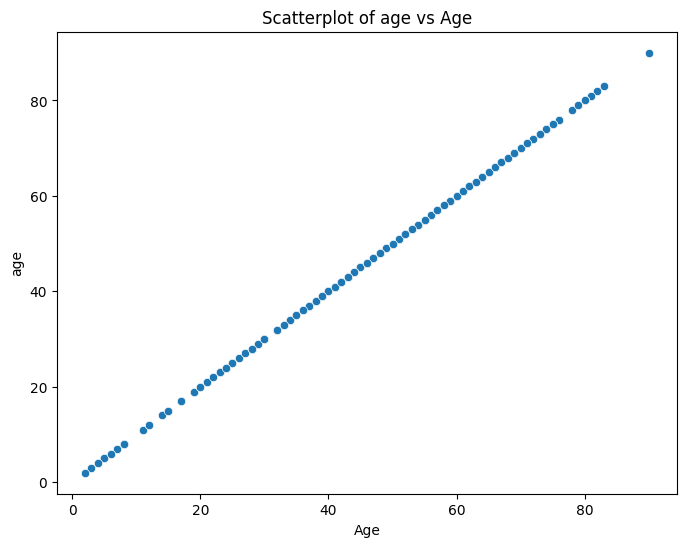

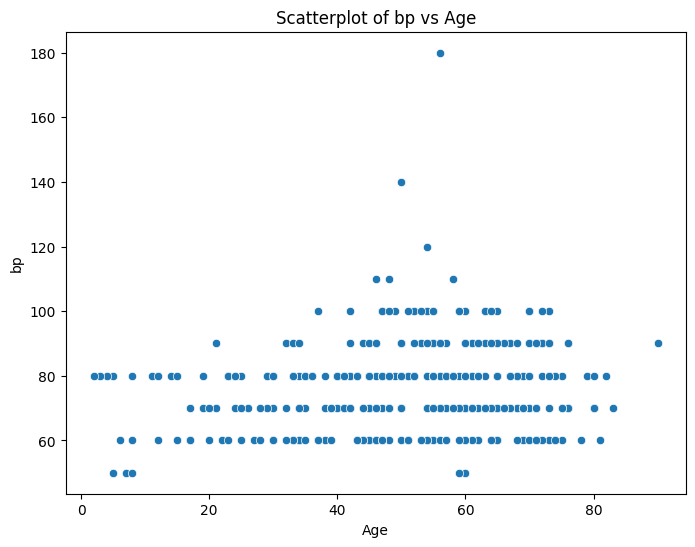

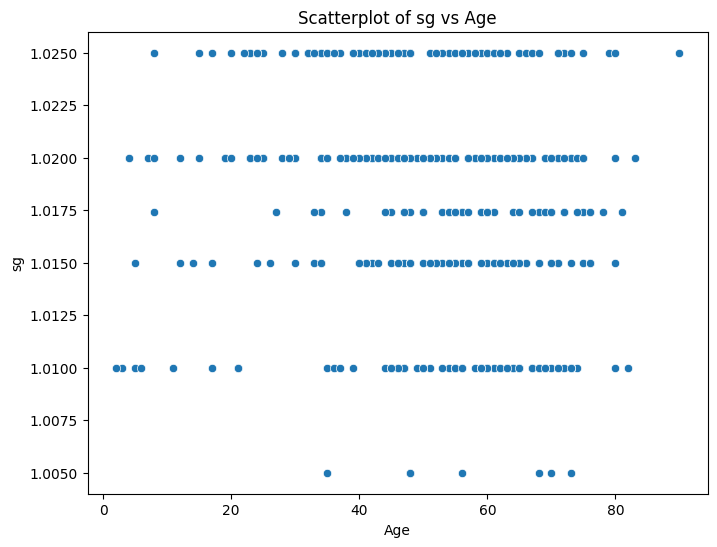

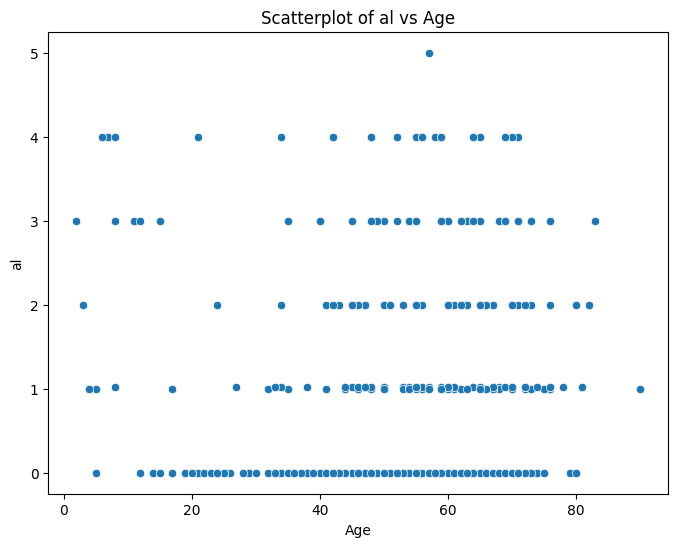

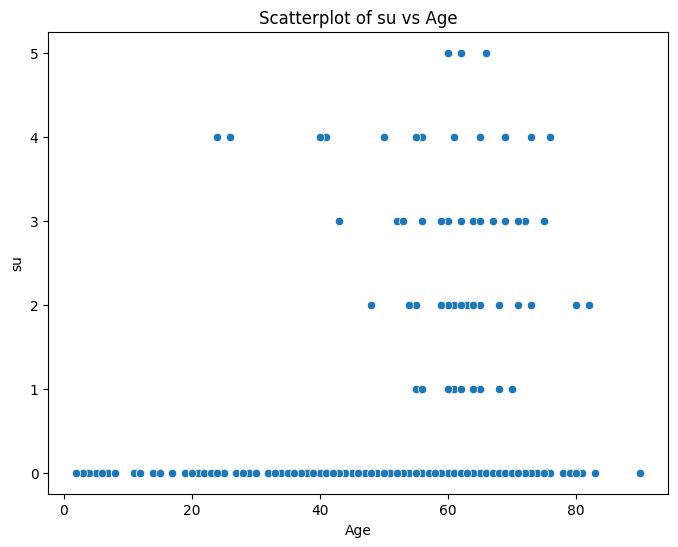

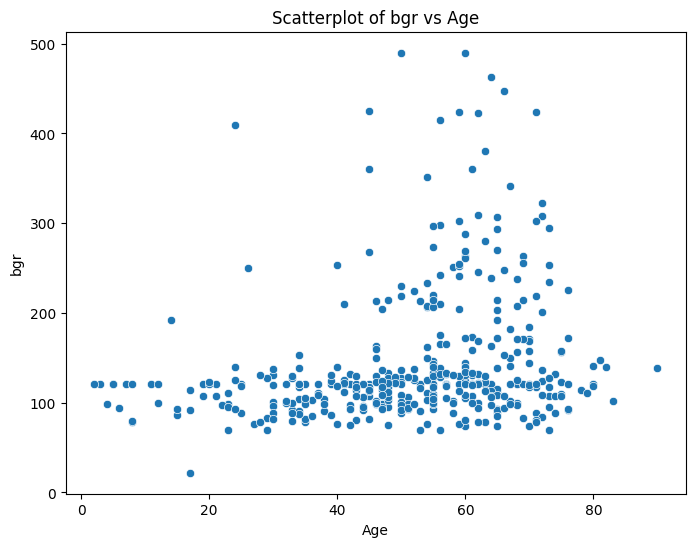

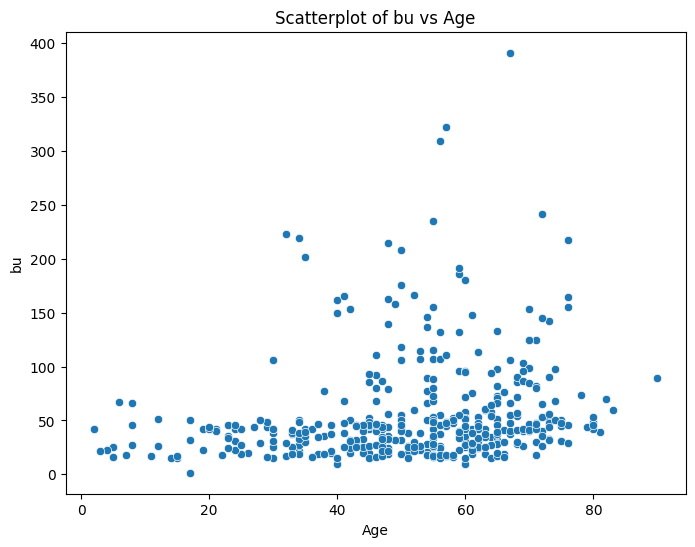

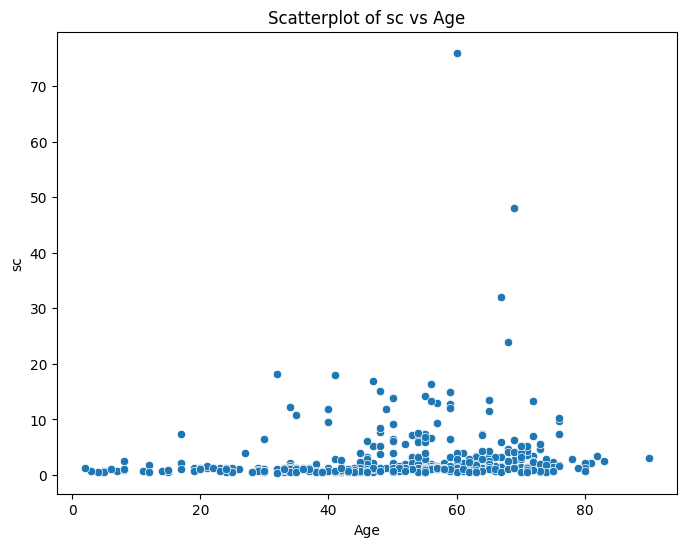

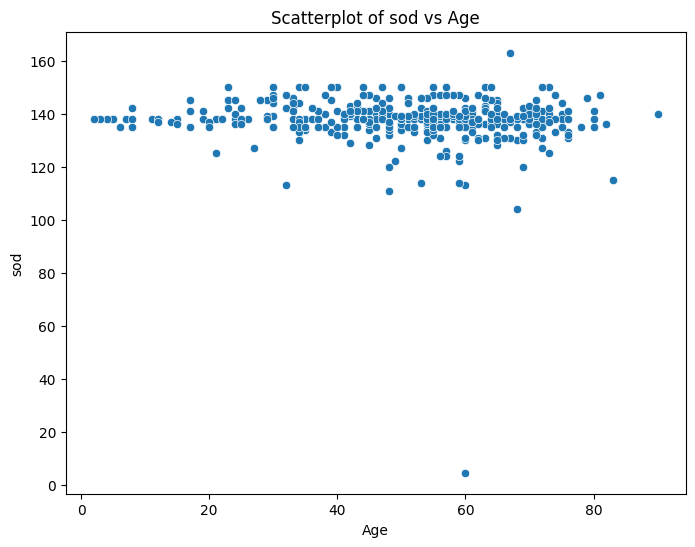

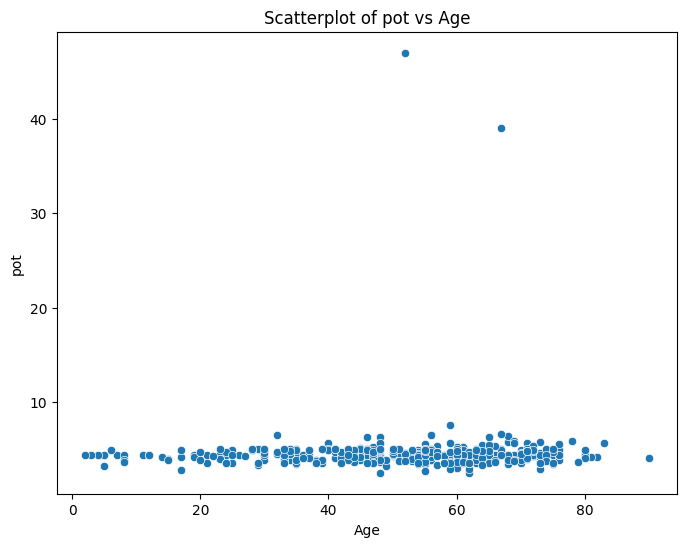

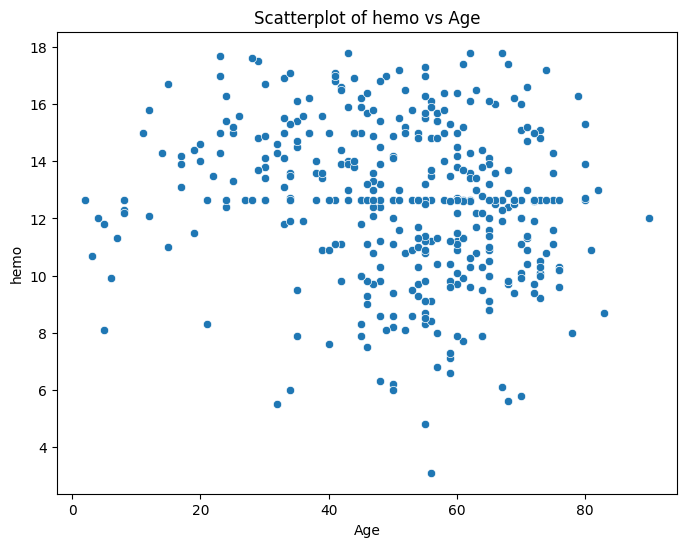

In [38]:
for i in lst_num :
    plt.figure(figsize=(8, 6))  # Set the figure size for each subplot
    sns.scatterplot(data=df, x='age', y=i)
    plt.title(f'Scatterplot of {i} vs Age')
    plt.xlabel('Age')
    plt.ylabel(i)
    plt.show()

In [39]:
lst_cat
   
    

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [40]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,ckd
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,...,38,6000,5.2,0.0,0.0,0.0,1.0,0.0,0.0,ckd
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,5.2,0.0,1.0,0.0,0.0,0.0,1.0,ckd
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,ckd
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,ckd


Visualizing the categorical feature


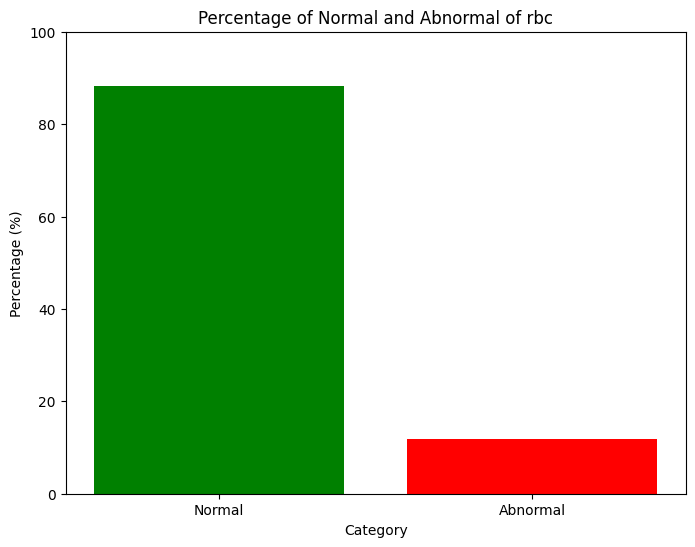

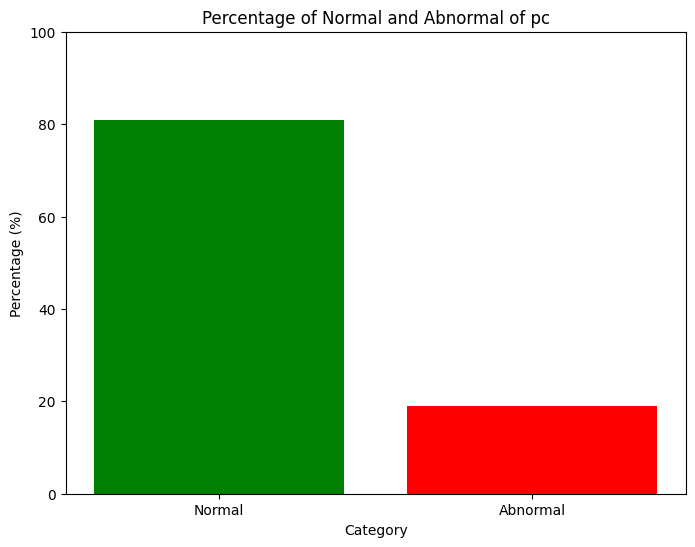

In [41]:
# Calculate the percentages
lst=['rbc','pc']
for i in lst :
    total_count = df[i].count()
    normal_percentage = (df[i].value_counts()[0] / total_count) * 100
    abnormal_percentage = (df[i].value_counts()[1] / total_count) * 100

    # Create a bar plot
    categories = ['Normal', 'Abnormal']
    percentages = [normal_percentage, abnormal_percentage]

    plt.figure(figsize=(8, 6))
    plt.bar(categories, percentages, color=['green', 'red'])
    plt.ylim(0, 100)  # Set y-axis limits to 0 and 100
    plt.title('Percentage of Normal and Abnormal of {}'.format(i))
    plt.xlabel('Category')
    plt.ylabel('Percentage (%)')

    plt.show()

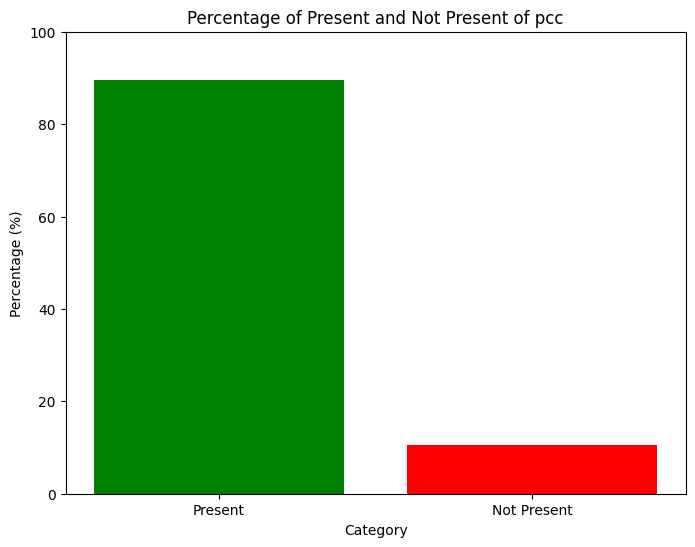

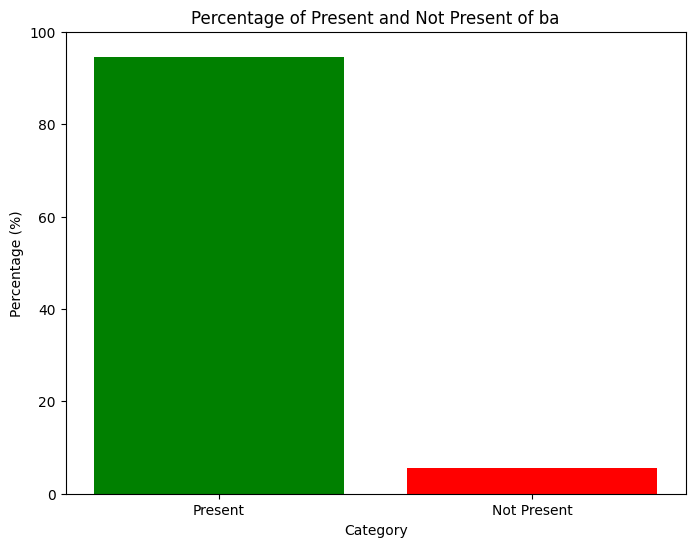

In [42]:
lst1=['pcc','ba']
for i in lst1 :
    total_count = df[i].count()
    present_percentage = (df[i].value_counts()[0] / total_count) * 100
    notpresent_percentage = (df[i].value_counts()[1] / total_count) * 100

    # Create a bar plot
    categories = ['Present', 'Not Present']
    percentages = [present_percentage, notpresent_percentage]

    plt.figure(figsize=(8, 6))
    plt.bar(categories, percentages, color=['green', 'red'])
    plt.ylim(0, 100)  # Set y-axis limits to 0 and 100
    plt.title('Percentage of Present and Not Present of {}'.format(i))
    plt.xlabel('Category')
    plt.ylabel('Percentage (%)')

    plt.show()

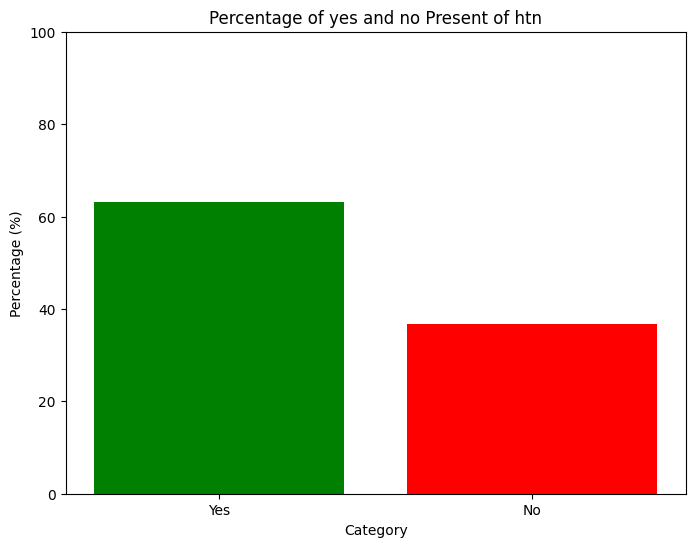

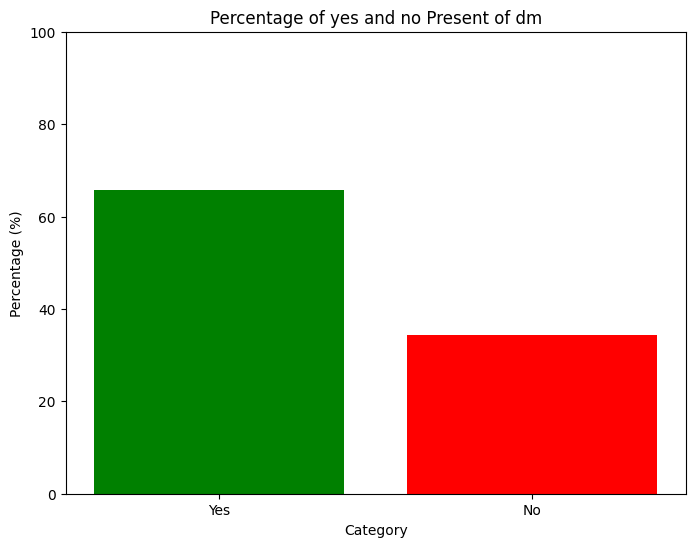

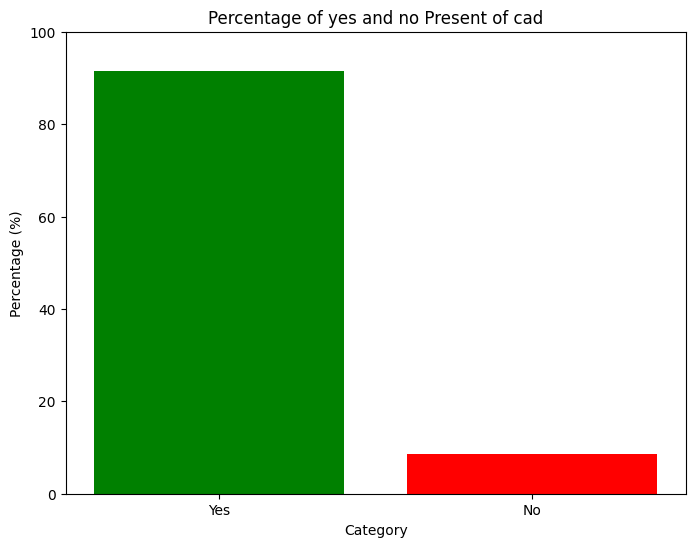

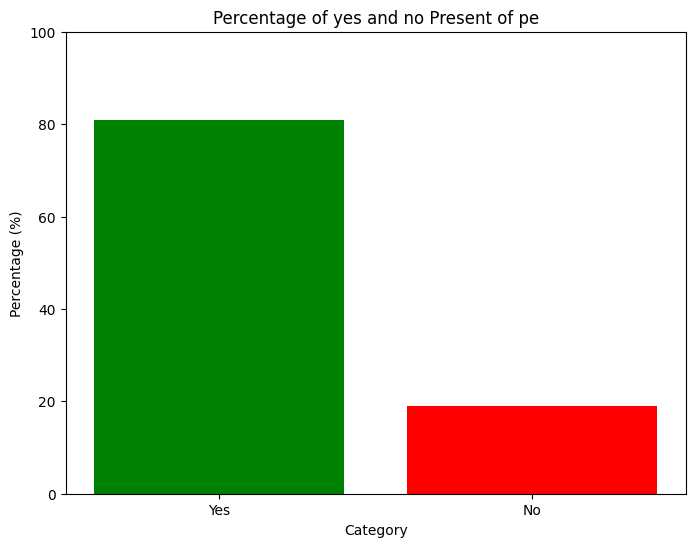

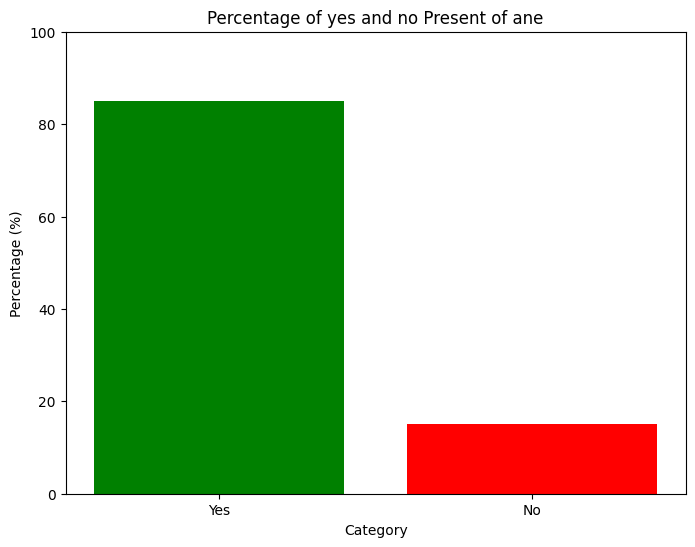

In [43]:
lst2=['htn','dm','cad','pe','ane']
for i in lst2 :
    total_count = df[i].count()
    yes_percentage = (df[i].value_counts()[0] / total_count) * 100
    no_percentage = (df[i].value_counts()[1] / total_count) * 100

    # Create a bar plot
    categories = ['Yes', 'No']
    percentages = [yes_percentage, no_percentage]

    plt.figure(figsize=(8, 6))
    plt.bar(categories, percentages, color=['green', 'red'])
    plt.ylim(0, 100)  # Set y-axis limits to 0 and 100
    plt.title('Percentage of yes and no Present of {}'.format(i))
    plt.xlabel('Category')
    plt.ylabel('Percentage (%)')

    plt.show()


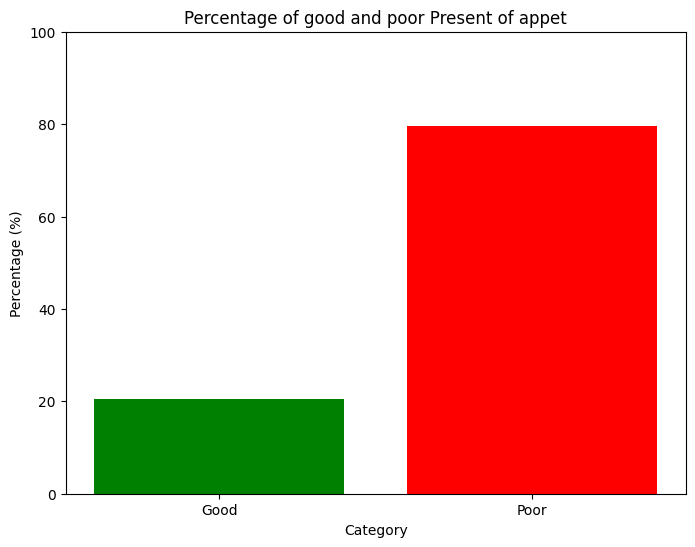

In [44]:
lst3=['appet']
lst2=['htn','dm','cad','pe','ane']
for i in lst3 :
    total_count = df[i].count()
    good_percentage = (df[i].value_counts()[0] / total_count) * 100
    poor_percentage = (df[i].value_counts()[1] / total_count) * 100

    # Create a bar plot
    categories = ['Good', 'Poor']
    percentages = [good_percentage,poor_percentage]

    plt.figure(figsize=(8, 6))
    plt.bar(categories, percentages, color=['green', 'red'])
    plt.ylim(0, 100)  # Set y-axis limits to 0 and 100
    plt.title('Percentage of good and poor Present of {}'.format(i))
    plt.xlabel('Category')
    plt.ylabel('Percentage (%)')

    plt.show()

In [45]:
l

NameError: name 'l' is not defined

In [ ]:
df['pc'].value_counts()[0]

76

In [ ]:
y=[]
for i in range (0,101) :
    y.append(i)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [ ]:
normal = ((df['pc'].value_counts()[0])/400)*100
abnormal = ((df['pc'].value_counts()[1])/400)*100
print(normal,abnormal)

81.0 19.0


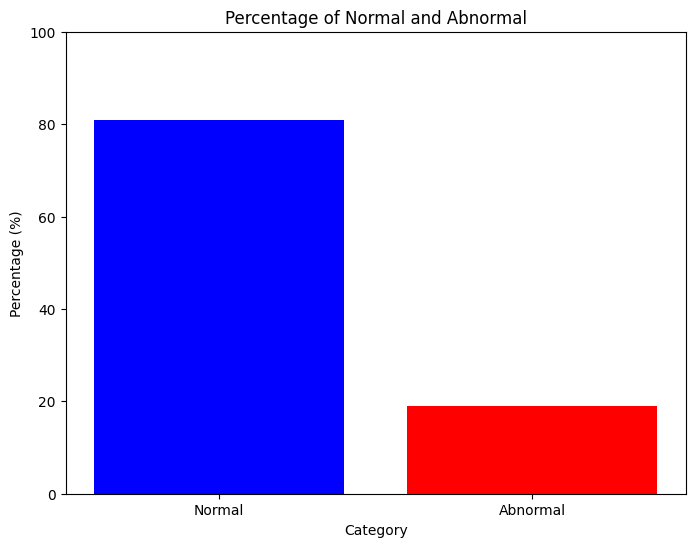

In [ ]:
# Calculate the percentages
total_count = df['pc'].count()
normal_percentage = (df['pc'].value_counts()[0] / total_count) * 100
abnormal_percentage = (df['pc'].value_counts()[1] / total_count) * 100

# Create a bar plot
categories = ['Normal', 'Abnormal']
percentages = [normal_percentage, abnormal_percentage]

plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=['blue', 'red'])
plt.ylim(0, 100)  # Set y-axis limits to 0 and 100
plt.title('Percentage of Normal and Abnormal')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')

plt.show()

In [ ]:
# Conclusions
# Conclusion from the categorical data
# Conclusion on the pc
# Around 80% of the people have normal pc and 20% have abnormal pc

# Conclusion on the pcc
# More than 80% population have pcc and less than 20% do not have pcc

# Conclusion on the ba
# More than 85% population have ba and less than 15% do not have ba

# Conclusion on the htn
# Almost 60% of the population has the hypertension and less than 40% do not have the hypertension

# Conclusion on the dm
# Almost 60% of the population has the dm and less than 40% do not have the dm

# Conclusion on the cad
# Almost 85% of the population has the cad and less than 15% do not have the cad

# Conclusion on the pe
# Almost 80% of the population has the pe and less than 20% do not have the pe

# Conclusion on the ane
# Almost 80% of the population has the ane and less than 20% do not have the ane

# Conclusion on the appet
# Around 20% of the people have good appet and around 80% of the people have the bas appet

# Conclusion from the numerical data
# Conclusion on the rbc
# More than 80% people have normal rbc and less than 20% have abnormal rbc

# Conclusion from the specific gravity vs age

# Most of the population have the normal specific grapvity range of specific gravity varies from 1.0150 to 1.0200
# Some people comes with lower specific gravity 1.0100.
# Very few people have the very low specific gravity of 1.0050
# Some people comes with the very higer specific gravity 1.0250.
# None have the specific gravity of 1.0225

# Conclusion from the al vs age

# Most of the population have the al between in the range of 0 to1
# From the whole population only one have the al 5 and the age of the population is 60

# Conclusion from the su vs age

# Most of the population which has the age range from 0 to 80 has the su equal to 0
# As the level of the su increases from 0 to 5 the population of the ages on the each level of the su decreases
# At the age

# Conclusion from the bgr vs age
# As the age varies from 0 to 80 all population in these group have the bgr more than 100 but less than 200
# At the age group of 80-40 the bgr varies from 300-400
# There are only one point who have bgr less than 50 and the age of the person is around 19
# There are few people who have bgr between 400 and 500

# Conclusion from the bu vs age
# As the age varies from 0 to 80 all population in these group have the bgr aroud 50
# Between age 40 to 60 there are the people who have the bu between 0 to 50 and also in between 150 to 200
# One person have the bu almost 0 and the age is around 19
# There is one person who have the bu 400 and the age is around 60

# Conclusion from the sc vs age
# All the people have and the range of the age is 0-80 their sc more than 0 and less than 5
# Very few people have and the range of the age is 18-65 their sc in between 10-50

# Conclusion from the sod vs age
# Almost all the age which is varying from 0-80 have the sodium level 140
# Very few ages of people have sodium level more than 140 and less than 140

# Conclusion from the pot vs age
# Almost all the age which is varying from 0-80 have the potassium level more than 0 and less than 10

# Conclusion from the hemo vs age
# Population which have age between 0-20 have the hemo level between 8 to 12
# Population which have age between 20-60 have the hemo level between more than 8 and less than 18
# There are very few age who have hemo less than 8
# All the age have hemo under 18